In [436]:
import re
import pandas as pd


In [438]:
f = open("WhatsApp Chat with IIIT Agartala Unofficial 2027.txt",'r',encoding='utf-8')

In [440]:
data = f.read()

In [442]:
print(data)

28/08/2023, 15:09 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
28/08/2023, 10:29 - +91 72669 00641 created group "IIIT Agartala 2027"
28/08/2023, 15:09 - You joined using this group's invite link
28/08/2023, 15:58 - +91 93680 68807 joined using this group's invite link
28/08/2023, 15:51 - +91 93998 40213: Sab TSR park pahuch jaana
28/08/2023, 15:51 - +91 93998 40213: https://maps.google.com/?cid=8016106431906385697&entry=gps
28/08/2023, 15:51 - +91 93998 40213: TSR park location
28/08/2023, 16:03 - +91 79059 99459 joined using this group's invite link
28/08/2023, 16:28 - +91 93998 40213: Good Morning respected seniors and my dear friends, 

1. My name is _____ (Full name) 
2. My date of birth is _______. 
3. I am from ______ (Complete Address with  pincode) 
4. My father's name is Mr. _____ .
5.He is ________.
6. I have done my matriculation from ____ (school name and address) which is affi

In [443]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'


In [444]:
messages = re.split(pattern,data)[1:]
print(messages)

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n', '+91 72669 00641 created group "IIIT Agartala 2027"\n', "You joined using this group's invite link\n", "+91 93680 68807 joined using this group's invite link\n", '+91 93998 40213: Sab TSR park pahuch jaana\n', '+91 93998 40213: https://maps.google.com/?cid=8016106431906385697&entry=gps\n', '+91 93998 40213: TSR park location\n', "+91 79059 99459 joined using this group's invite link\n", "+91 93998 40213: Good Morning respected seniors and my dear friends, \n\n1. My name is _____ (Full name) \n2. My date of birth is _______. \n3. I am from ______ (Complete Address with\xa0 pincode) \n4. My father's name is Mr. _____ .\n5.He is ________.\n6. I have done my matriculation from ____ (school name and address) which is affiliated to _____ ( board's name in full form) with ____ (percentage / Cumulative Grade Points Average). \n7. I have done my inter

In [447]:
dates = re.findall(pattern,data)

In [448]:
dates

['28/08/2023, 15:09 - ',
 '28/08/2023, 10:29 - ',
 '28/08/2023, 15:09 - ',
 '28/08/2023, 15:58 - ',
 '28/08/2023, 15:51 - ',
 '28/08/2023, 15:51 - ',
 '28/08/2023, 15:51 - ',
 '28/08/2023, 16:03 - ',
 '28/08/2023, 16:28 - ',
 '28/08/2023, 16:28 - ',
 '28/08/2023, 16:28 - ',
 '28/08/2023, 16:29 - ',
 '28/08/2023, 16:29 - ',
 '28/08/2023, 16:31 - ',
 '28/08/2023, 16:38 - ',
 '28/08/2023, 16:39 - ',
 '28/08/2023, 16:39 - ',
 '28/08/2023, 16:39 - ',
 '28/08/2023, 16:39 - ',
 '28/08/2023, 16:39 - ',
 '28/08/2023, 16:39 - ',
 '28/08/2023, 16:40 - ',
 '28/08/2023, 16:40 - ',
 '28/08/2023, 16:44 - ',
 '28/08/2023, 16:45 - ',
 '28/08/2023, 16:45 - ',
 '28/08/2023, 17:42 - ',
 '28/08/2023, 19:20 - ',
 '28/08/2023, 20:23 - ',
 '28/08/2023, 20:24 - ',
 '28/08/2023, 20:24 - ',
 '28/08/2023, 20:26 - ',
 '28/08/2023, 21:41 - ',
 '28/08/2023, 22:09 - ',
 '29/08/2023, 12:13 - ',
 '29/08/2023, 22:55 - ',
 '01/09/2023, 16:10 - ',
 '01/09/2023, 16:41 - ',
 '01/09/2023, 18:29 - ',
 '01/09/2023, 19:26 - ',


In [449]:
df = pd.DataFrame({'user_message':messages,'message_dates':dates})
df['message_dates'] = pd.to_datetime(df['message_dates'], format="%d/%m/%Y, %H:%M - ", errors='coerce')
df.rename(columns={'message_dates':'date'},inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-08-28 15:09:00
1,"+91 72669 00641 created group ""IIIT Agartala 2...",2023-08-28 10:29:00
2,You joined using this group's invite link\n,2023-08-28 15:09:00
3,+91 93680 68807 joined using this group's invi...,2023-08-28 15:58:00
4,+91 93998 40213: Sab TSR park pahuch jaana\n,2023-08-28 15:51:00


In [450]:
df.shape

(5168, 2)

In [451]:
users = []
messages = []
for i in df['user_message']:
    entry = re.split('([\\w\\W]+?):\\s', i)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
del df['user_message']
df.head()

,date,user,message
0,2023-08-28 15:09:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-08-28 10:29:00,group_notification,"+91 72669 00641 created group ""IIIT Agartala 2..."
2,2023-08-28 15:09:00,group_notification,You joined using this group's invite link\n
3,2023-08-28 15:58:00,group_notification,+91 93680 68807 joined using this group's invi...
4,2023-08-28 15:51:00,+91 93998 40213,Sab TSR park pahuch jaana\n


In [453]:
df['year'] = df['date'].dt.year

In [454]:
df['month'] = df['date'].dt.month_name()

In [455]:
df['day'] = df['date'].dt.day

In [456]:
df['hour'] = df['date'].dt.hour

In [457]:
df['minute'] = df['date'].dt.minute

In [460]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-08-28 15:09:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,August,28,15,9
1,2023-08-28 10:29:00,group_notification,"+91 72669 00641 created group ""IIIT Agartala 2...",2023,August,28,10,29
2,2023-08-28 15:09:00,group_notification,You joined using this group's invite link\n,2023,August,28,15,9
3,2023-08-28 15:58:00,group_notification,+91 93680 68807 joined using this group's invi...,2023,August,28,15,58
4,2023-08-28 15:51:00,+91 93998 40213,Sab TSR park pahuch jaana\n,2023,August,28,15,51


In [469]:
z = df[df['user']=='Deeptamsh Iiit Cse']
z.shape
z

,date,user,message,year,month,day,hour,minute
354,2024-01-19 12:56:00,Deeptamsh Iiit Cse,<Media omitted>\n,2024,January,19,12,56
355,2024-01-19 12:57:00,Deeptamsh Iiit Cse,These are the remaining students\n,2024,January,19,12,57
809,2024-07-31 10:58:00,Deeptamsh Iiit Cse,😂😂😂\n,2024,July,31,10,58
1553,2024-08-21 21:33:00,Deeptamsh Iiit Cse,<Media omitted>\n,2024,August,21,21,33
2322,2024-09-08 15:07:00,Deeptamsh Iiit Cse,<Media omitted>\n,2024,September,8,15,7
2393,2024-09-09 13:50:00,Deeptamsh Iiit Cse,23UICS184\n,2024,September,9,13,50
3217,2024-10-24 14:46:00,Deeptamsh Iiit Cse,Happy birthday @916363211442 🥳\n,2024,October,24,14,46
4242,2025-01-13 11:16:00,Deeptamsh Iiit Cse,This message was deleted\n,2025,January,13,11,16
4309,2025-01-14 21:56:00,Deeptamsh Iiit Cse,<Media omitted>\n,2025,January,14,21,56
4312,2025-01-14 22:03:00,Deeptamsh Iiit Cse,<Media omitted>\n,2025,January,14,22,3


In [471]:
words = []
for message in df['message']:
    words.extend(message.split())

In [472]:
words

['Messages',
 'and',
 'calls',
 'are',
 'end-to-end',
 'encrypted.',
 'No',
 'one',
 'outside',
 'of',
 'this',
 'chat,',
 'not',
 'even',
 'WhatsApp,',
 'can',
 'read',
 'or',
 'listen',
 'to',
 'them.',
 'Tap',
 'to',
 'learn',
 'more.',
 '+91',
 '72669',
 '00641',
 'created',
 'group',
 '"IIIT',
 'Agartala',
 '2027"',
 'You',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 '+91',
 '93680',
 '68807',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Sab',
 'TSR',
 'park',
 'pahuch',
 'jaana',
 'https://maps.google.com/?cid=8016106431906385697&entry=gps',
 'TSR',
 'park',
 'location',
 '+91',
 '79059',
 '99459',
 'joined',
 'using',
 'this',
 "group's",
 'invite',
 'link',
 'Good',
 'Morning',
 'respected',
 'seniors',
 'and',
 'my',
 'dear',
 'friends,',
 '1.',
 'My',
 'name',
 'is',
 '_____',
 '(Full',
 'name)',
 '2.',
 'My',
 'date',
 'of',
 'birth',
 'is',
 '_______.',
 '3.',
 'I',
 'am',
 'from',
 '______',
 '(Complete',
 'Address',
 'with',
 'pincode

In [473]:
len(words)

32311

In [476]:
df[df['message']=='<Media omitted>\n'].shape[0]

492

In [480]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [481]:
from urlextract import URLExtract
extractor = URLExtract()


In [482]:
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))

In [483]:
links

['https://maps.google.com/?cid=8016106431906385697&entry=gps',
 'https://drive.google.com/drive/folders/1TsKIuQd4tM2QavcJHC5LXlcedo9Y1jlO',
 'https://drive.google.com/drive/folders/1MzB_XdK_Hlnc2VU4Col-91jbTjKD4vHL?usp=drive_link',
 'https://youtu.be/DDQaAvtP19k?si=u7g6aAlYBavwk74p',
 'https://chat.whatsapp.com/J0ZNRgquGS622Nk2Id4J0l',
 'https://chat.whatsapp.com/L24cERz9lD148rOqs33wy8',
 'https://chat.whatsapp.com/Lb50ugT53AGAcmy2P9axOh',
 'https://docs.google.com/forms/d/e/1FAIpQLSfw2y2HD-aqJ1ah3kLntHrrX4-gadnNaRU53j9xcLEioW-Ylg/viewform?usp=sf_link',
 'https://docs.google.com/forms/d/e/1FAIpQLSfw2y2HD-aqJ1ah3kLntHrrX4-gadnNaRU53j9xcLEioW-Ylg/viewform?usp=sf_link',
 'https://asmita.iiita.ac.in/',
 'https://chat.whatsapp.com/DM1R034r7S5KWDBxPJ73pu',
 'https://chat.whatsapp.com/GxOBphRwyABBCkk78n48fW',
 'https://chat.whatsapp.com/GxOBphRwyABBCkk78n48fW',
 'https://www.instagram.com/reel/C6yyn4Cyltc/?igsh=MTdxN2o1eDcwMHV1MQ==',
 'https://forms.gle/q77pVKMsRMDjd65EA',
 'https://docs.goog

In [484]:
len(links)

47

In [485]:
import matplotlib.pyplot as plt

In [486]:
df.head()


,date,user,message,year,month,day,hour,minute
0,2023-08-28 15:09:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,August,28,15,9
1,2023-08-28 10:29:00,group_notification,"+91 72669 00641 created group ""IIIT Agartala 2...",2023,August,28,10,29
2,2023-08-28 15:09:00,group_notification,You joined using this group's invite link\n,2023,August,28,15,9
3,2023-08-28 15:58:00,group_notification,+91 93680 68807 joined using this group's invi...,2023,August,28,15,58
4,2023-08-28 15:51:00,+91 93998 40213,Sab TSR park pahuch jaana\n,2023,August,28,15,51


In [487]:
x = df['user'].value_counts().head()
x

user
+91 79916 91019    667
+91 82101 13139    471
+91 94716 49526    457
+91 86305 77199    330
+91 93998 40213    329
Name: count, dtype: int64

In [488]:
name = x.index
count = x.values

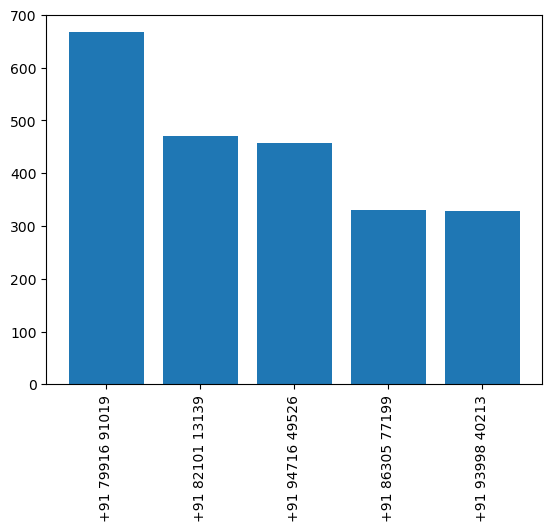

In [489]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [490]:
round(df['user'].value_counts()/df.shape[0]*100,2).reset_index().rename(columns={'user':'name','count':'percentage'})

,name,percentage
0,+91 79916 91019,12.91
1,+91 82101 13139,9.11
2,+91 94716 49526,8.84
3,+91 86305 77199,6.39
4,+91 93998 40213,6.37
...,...,...
63,Vishal IIIT Cse,0.06
64,Saajan,0.06
65,+91 87003 02619,0.04
66,+91 94519 10470,0.02


In [491]:
temp = df[df['user']!='group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']
temp = temp[temp['message'] != 'TThis message was deleted']


In [492]:
temp

,date,user,message,year,month,day,hour,minute
4,2023-08-28 15:51:00,+91 93998 40213,Sab TSR park pahuch jaana\n,2023,August,28,15,51
5,2023-08-28 15:51:00,+91 93998 40213,https://maps.google.com/?cid=80161064319063856...,2023,August,28,15,51
6,2023-08-28 15:51:00,+91 93998 40213,TSR park location\n,2023,August,28,15,51
8,2023-08-28 16:28:00,+91 93998 40213,Good Morning respected seniors and my dear fri...,2023,August,28,16,28
12,2023-08-28 16:29:00,+91 93998 40213,Good Morning respected seniors and my dear fri...,2023,August,28,16,29
...,...,...,...,...,...,...,...,...
5162,2025-02-13 08:51:00,+91 84006 01441,.\n,2025,February,13,8,51
5164,2025-02-13 10:43:00,+91 99734 03375,Assignment ka photo bhej do bhai mpmc ka\n,2025,February,13,10,43
5165,2025-02-13 10:44:00,+91 82101 13139,Next class CSe building\n,2025,February,13,10,44
5166,2025-02-13 10:51:00,+91 91421 46612,Room no?\n,2025,February,13,10,51


In [493]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [494]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [495]:
words

['tsr',
 'park',
 'pahuch',
 'jaana',
 'https://maps.google.com/?cid=8016106431906385697&entry=gps',
 'tsr',
 'park',
 'location',
 'morning',
 'respected',
 'seniors',
 'dear',
 'friends,',
 '1.',
 '_____',
 '(full',
 'name)',
 '2.',
 'date',
 'birth',
 '_______.',
 '3.',
 '______',
 '(complete',
 'address',
 'pincode)',
 '4.',
 "father's",
 'mr.',
 '_____',
 '5.he',
 '________.',
 '6.',
 'matriculation',
 '____',
 '(school',
 'address)',
 'affiliated',
 '_____',
 '(',
 "board's",
 'form)',
 '____',
 '(percentage',
 '/',
 'cumulative',
 'grade',
 'points',
 'average).',
 '7.',
 'intermediate',
 '____',
 '(school',
 'address)',
 'affiliated',
 '_____',
 '(',
 "board's",
 'form)',
 '____',
 '(percentage',
 '/',
 'cumulative',
 'grade',
 'points',
 'average).',
 '8.',
 'secured',
 '______',
 '(',
 'rank',
 '/',
 'score)',
 '_______',
 '(wbjee',
 '/',
 'jee',
 'form)',
 '______',
 '(branch',
 'name)',
 '9.',
 '_______',
 '(',
 'college',
 'name)',
 '10.',
 'currently',
 'pursuing',
 'bach

In [496]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,class,478
1,message,439
2,deleted,324
3,lab,137
4,<this,105
5,edited>,105
6,dcld,101
7,happy,100
8,cancel,94
9,birthday,93


In [497]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [498]:
import emoji
emoji.__version__

'2.14.1'

In [499]:
emojis = []
for message in df['message']:
    emojis.extend([i for i in message if i in emoji.EMOJI_DATA])

In [500]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🥲,99
1,🙂,93
2,😂,83
3,🤣,71
4,🎉,65
...,...,...
137,👀,1
138,✅,1
139,🏕,1
140,📝,1


In [501]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-08-28 15:09:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,August,28,15,9
1,2023-08-28 10:29:00,group_notification,"+91 72669 00641 created group ""IIIT Agartala 2...",2023,August,28,10,29
2,2023-08-28 15:09:00,group_notification,You joined using this group's invite link\n,2023,August,28,15,9
3,2023-08-28 15:58:00,group_notification,+91 93680 68807 joined using this group's invi...,2023,August,28,15,58
4,2023-08-28 15:51:00,+91 93998 40213,Sab TSR park pahuch jaana\n,2023,August,28,15,51


In [502]:
df['month_num'] = df['date'].dt.month

In [503]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num
0,2023-08-28 15:09:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,August,28,15,9,8
1,2023-08-28 10:29:00,group_notification,"+91 72669 00641 created group ""IIIT Agartala 2...",2023,August,28,10,29,8
2,2023-08-28 15:09:00,group_notification,You joined using this group's invite link\n,2023,August,28,15,9,8
3,2023-08-28 15:58:00,group_notification,+91 93680 68807 joined using this group's invi...,2023,August,28,15,58,8
4,2023-08-28 15:51:00,+91 93998 40213,Sab TSR park pahuch jaana\n,2023,August,28,15,51,8


In [508]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()
timeline.shape

(19, 4)

In [510]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [512]:
print(time)

['August-2023', 'September-2023', 'October-2023', 'November-2023', 'December-2023', 'January-2024', 'February-2024', 'March-2024', 'April-2024', 'May-2024', 'June-2024', 'July-2024', 'August-2024', 'September-2024', 'October-2024', 'November-2024', 'December-2024', 'January-2025', 'February-2025']


In [514]:
timeline['time'] = time

In [516]:
timeline.head()

,year,month_num,month,message,time
0,2023,8,August,36,August-2023
1,2023,9,September,177,September-2023
2,2023,10,October,90,October-2023
3,2023,11,November,12,November-2023
4,2023,12,December,2,December-2023


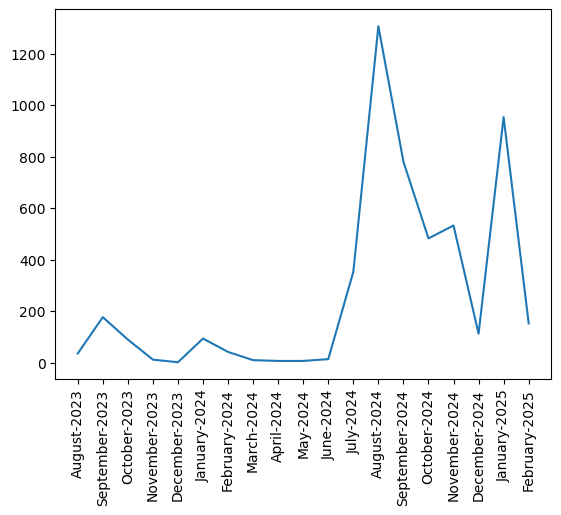

In [522]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [526]:
df['day_name'] = df['date'].dt.day_name()

In [528]:
df['day_name'].value_counts()

day_name
Wednesday    1021
Tuesday       908
Friday        904
Monday        862
Thursday      684
Sunday        428
Saturday      361
Name: count, dtype: int64

In [530]:
df['month'].value_counts()

month
August       1343
January      1048
September     958
October       573
November      545
July          353
February      195
December      115
June           14
March          10
May             7
April           7
Name: count, dtype: int64

In [540]:
period = []
for hour in df['hour']:
    if hour == 23:
        period.append(str(hour) + "-00")
    elif hour == 0:
        period.append("00-01")
    else:
        period.append(str(hour) + "-" + str(hour + 1))
df['period'] = period

In [542]:
import seaborn as sns


<Axes: xlabel='period', ylabel='day_name'>

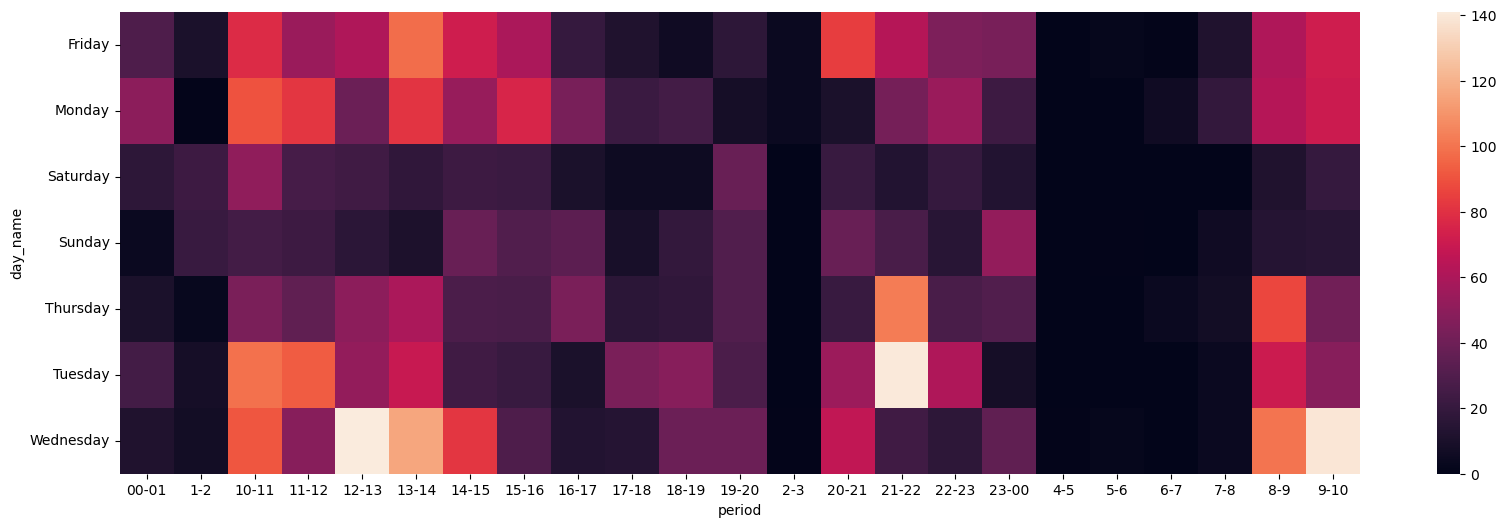

In [546]:
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))